## Figure 6: $50K Cancellation By Assets, Race

from "Student Debt Cancellation *Is* Progressive", a Roosevelt Institute research paper 

by Charlie Eaton, Adam Goldstein, Laura Hamilton, and Frederick Wherry

In [1]:
*ssc install dubois
*ssc install combomarginsplot

In [2]:
graph set svg fontface Tahoma
graph set eps fontface Tahoma
graph set ps fontface Tahoma
set scheme dubois

In [3]:
use data/scfstudentdebt2019, clear

In [4]:
qui {

gen selfparent=self_fedloans + parentalfedloans
    
foreach amt in 10000 50000 75000 {
gen selfcancel`amt'=`amt'
    replace selfcancel`amt'=selfparent if selfparent<`amt'

gen spousecancel`amt'=`amt'
replace spousecancel`amt'=spouse_fedloans if spouse_fedloans<`amt'
  
egen householdcancel`amt'=rowtotal(selfcancel`amt' spousecancel`amt')

gen percapcancel`amt'=householdcancel`amt'
    replace percapcancel`amt'=householdcancel`amt' / 2  if married==1 & householdcancel`amt'!=0
    }
}

In [5]:
qui regress percapcancel50000 i.assetcat##i.race if selfstudent!=1 & spousestudent!=1 [pw=wgt] 
qui margins i.assetcat#i.race if race<4


  Variables that uniquely identify margins: assetcat race


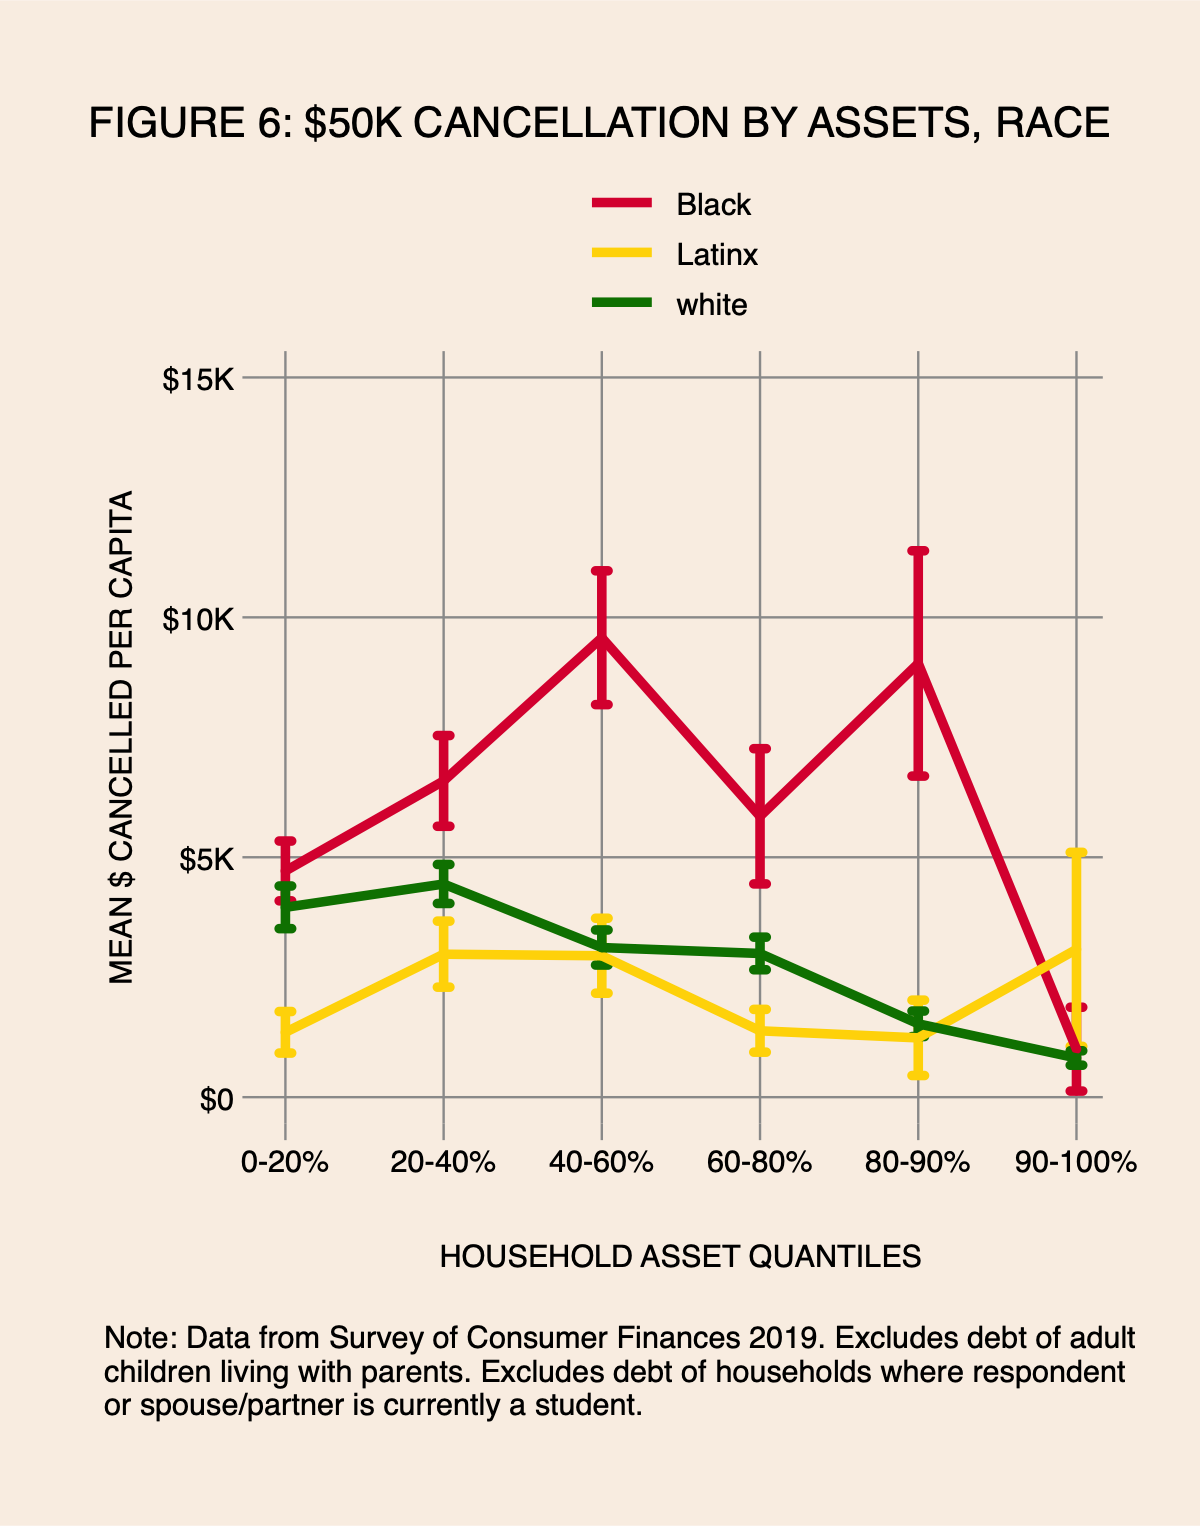

In [6]:
marginsplot, name(low, replace) graphregion(margin(large)) ///
legend(pos(12)) ///
ytitle(MEAN $ CANCELLED PER CAPITA) title("FIGURE 6: $50K CANCELLATION BY ASSETS, RACE", size(3.5)) ///
xscale(titlegap(large)) xtitle(HOUSEHOLD ASSET QUANTILES) graphregion(margin(large)) ///
note(" " "Note: Data from Survey of Consumer Finances 2019. Excludes debt of adult" ///
    "children living with parents. Excludes debt of households where respondent" ///
    "or spouse/partner is currently a student.", size(small) xoffset(0)) graphregion(margin(large)) ///
    xscale(titlegap(large)) ylabel(0 "$0" 5000 "$5K" 10000 "$10K" 15000 "$15K") ///
    xtitle(HOUSEHOLD ASSET QUANTILES) scheme(dubois)

In [7]:
qui graph export figures/f6_cancelassetsrace.pdf, replace

In [8]:
qui gen age2=age*age

In [9]:
qui regress percapcancel50000 i.assetcat##i.race age age2 if selfstudent!=1 & spousestudent!=1 & race<4 [pw=wgt] 
qui margins i.assetcat#i.race


  Variables that uniquely identify margins: assetcat race


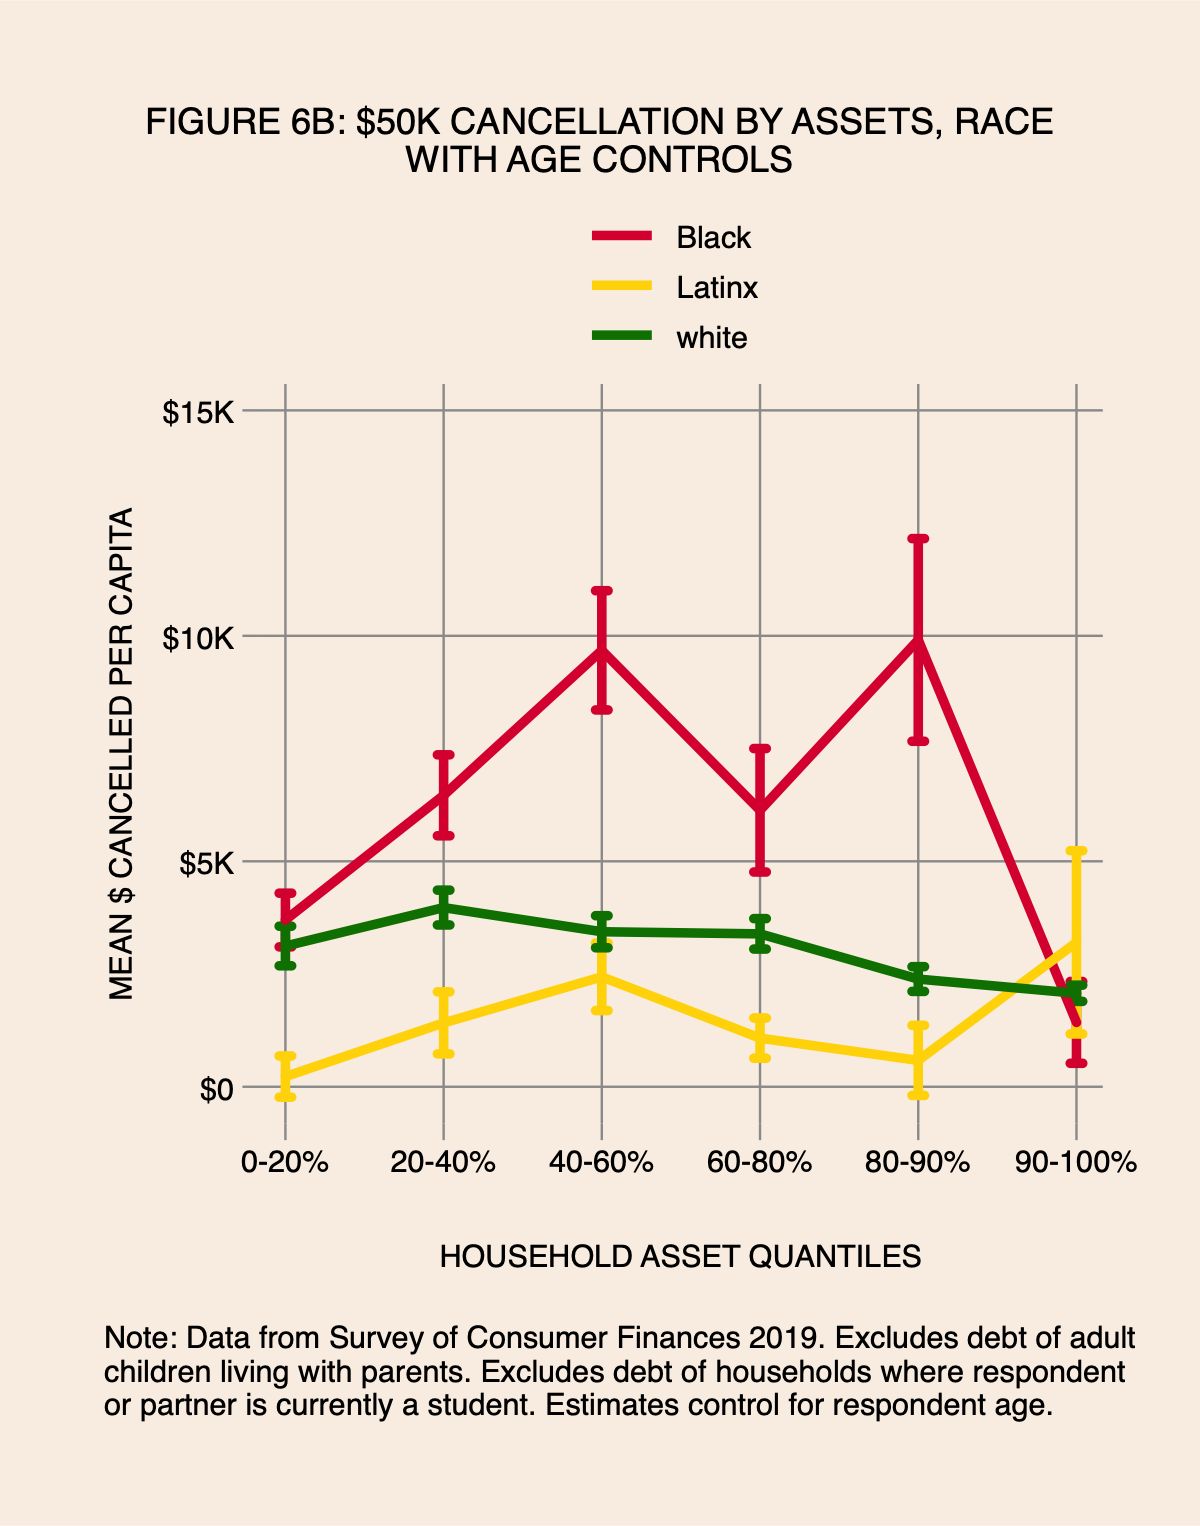

In [10]:
marginsplot, name(low, replace) graphregion(margin(large)) legend(pos(12)) ///
ytitle(MEAN $ CANCELLED PER CAPITA) title("FIGURE 6B: $50K CANCELLATION BY ASSETS, RACE" ///
"WITH AGE CONTROLS") xscale(titlegap(large)) xtitle(HOUSEHOLD ASSET QUANTILES) graphregion(margin(large)) ///
note(" " "Note: Data from Survey of Consumer Finances 2019. Excludes debt of adult" ///
    "children living with parents. Excludes debt of households where respondent" ///
    "or partner is currently a student. Estimates control for respondent age.", ///
    size(small) xoffset(0)) graphregion(margin(large)) ///
    xscale(titlegap(large)) ylabel(0 "$0" 5000 "$5K" 10000 "$10K" 15000 "$15K") ///
    xtitle(HOUSEHOLD ASSET QUANTILES) scheme(dubois)